In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Data Analysis

In [135]:
# Read the data
df = pd.read_csv('./titanic/train.csv')
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


### Look at the labels first
- Check how many examples belong to each class. If one class is much smaller than the other, that will affect how we evaluate the model and how we handle sampling later.

In [ ]:
# Label = df["Survived"]
print(f"Unique labels: {df["Survived"].unique()}")
count_1 = len(df[df["Survived"] == 1])
count_0 = len(df[df["Survived"] == 0])
print(f"Rows with a positive label: {count_1}")
print(f"Rows with a negative label: {count_0}")

Unique labels: [0 1]
Rows with a positive label: 342
Rows with a negative label: 549


### Get a feel for each feature
- For numerical features, look at basic stats: min, max, mean, standard deviation, and a few plots like histograms or box plots. We just want to know the rough shape of the data, see if things look normal or if there are weird outliers.
- For categorical features, look at value counts to see if some categories barely appear.

In [137]:
# Describe numerical features
df.describe(include=[object, int])

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,891.000000,891.000000,891,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,681,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,347082,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,7,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,0.523008,0.381594,NaN,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,1.102743,0.806057,NaN,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,1.000000,0.000000,NaN,NaN,NaN


**Analyzing "Age"**

- Median - Sort the ages. The median is the middle value. If you have an even number of rows, take the average of the two middle values. This helps when the data has outliers.

- Standard Deviation - This tells you how spread out the ages are. A small value means most ages sit close to the mean. A large value means the ages vary a lot.

In [138]:
original_ages = df["Age"]

pct_null = df.Age.isna().sum() / len(df.Age) * 100
print(f"{pct_null:.2f}% of age values are null or NA")

# Remove null or NA Age values to get real stats
print(f"Minimum age: {df["Age"].min()}\t\tMaximum age: {df["Age"].max()}")
print(f"Mean age: {df["Age"].mean()}\tMedian age: {df["Age"].median()}")

# Drop null values to get the original stats
ages_no_null = df["Age"].dropna(inplace=False)

# Finding outliers
q1 = np.quantile(ages_no_null, 0.25)
q3 = np.quantile(ages_no_null, 0.75)
iqr = q3 - q1
print(f"Quantiles: {q1}, {ages_no_null.median()}, {q3}")
print(f"IQR = Q3 - Q1 = {iqr}")
print(f"Number of rows whose age < {(q1 - 1.5 * iqr)}: {len(df[df["Age"] < (q1 - 1.5 * iqr)])}")
print(f"Number of rows whose age > {(q3 + 1.5 * iqr)}: {len(df[df["Age"] > (q3 + 1.5 * iqr)])}")

imputed_ages = df["Age"]

19.87% of age values are null or NA
Minimum age: 0.42		Maximum age: 80.0
Mean age: 29.69911764705882	Median age: 28.0
Quantiles: 20.125, 28.0, 38.0
IQR = Q3 - Q1 = 17.875
Number of rows whose age < -6.6875: 0
Number of rows whose age > 64.8125: 11


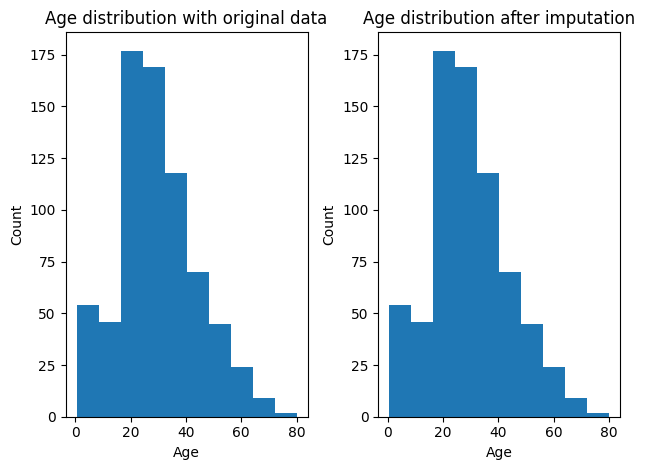

In [139]:
plt.subplot(1, 2, 1)
plt.hist(original_ages)
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age distribution with original data")

plt.subplot(1, 2, 2)
plt.hist(imputed_ages)
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age distribution after imputation")

# space between the plots
plt.tight_layout()

# show plot
plt.show()

**Analyzing categorical data**

In [123]:
# Pclass is a categorical value where the categories are integers
# These may need to be one hot encoded
pct_null = df.Pclass.isna().sum() / len(df.Pclass) * 100
print(f"{pct_null:.2f}% of Pclass values are null or NA")
print(f"Unique values of Pclass: {df["Pclass"].unique()}")

count_1 = len(df[df["Pclass"] == 1])
count_2 = len(df[df["Pclass"] == 2])
count_3 = len(df[df["Pclass"] == 3])
print(f"Rows with a value of 1: {count_1}")
print(f"Rows with a value of 2: {count_2}")
print(f"Rows with a value of 3: {count_3}")

0.00% of Pclass values are null or NA
Unique values of Pclass: [3 1 2]
Rows with a value of 1: 216
Rows with a value of 2: 184
Rows with a value of 3: 491


In [124]:
print(f"Unique values for Sibsp: {df["SibSp"].unique()}")
print(f"Unique values for Parch: {df["Parch"].unique()}")

Unique values for Sibsp: [1 0 3 4 2 5 8]
Unique values for Parch: [0 1 2 5 3 4 6]


### Check simple relationships
- Pairwise correlations for numeric features can tell us if two variables carry the same information. 
- Scatterplots or simple crosstabs help a lot. We want to see what features might be useful, noisy, or redundant.

**Pairwise correlations**
- This gives you a square matrix where each cell is the correlation between two numeric columns. Values close to 1 or -1 mean the two features contain almost the same information.

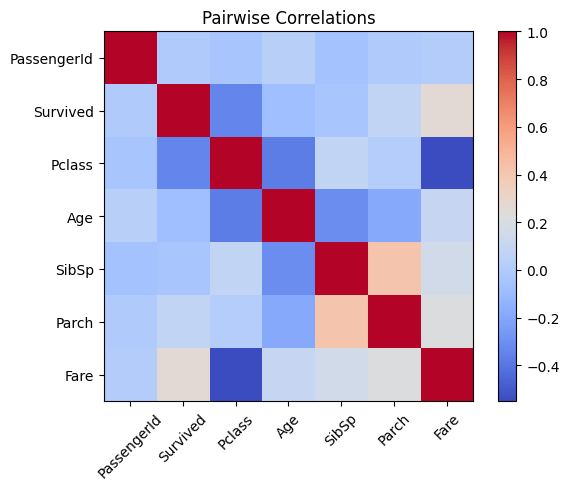

In [143]:
corr = df.corr(numeric_only=True)
plt.imshow(corr, cmap="coolwarm", interpolation="nearest")
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=45)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title("Pairwise Correlations")
plt.show()

**Scatterplots**
- These are used when both variables are numeric. They help us see linear or nonlinear relationships, clusters, outliers, and even whether two features look redundant.

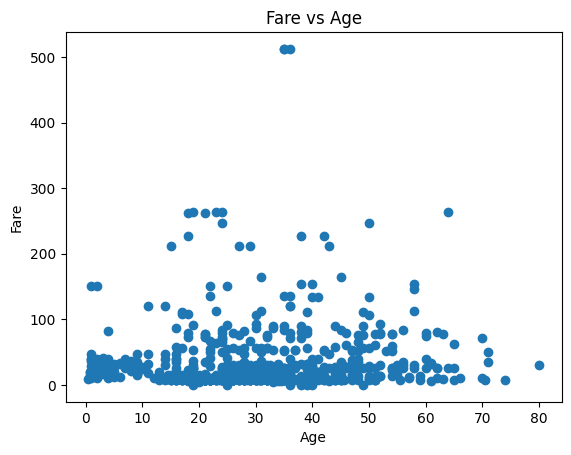

In [152]:
plt.scatter(df["Age"], df["Fare"])
plt.xlabel("Age")
plt.ylabel("Fare")
plt.title("Fare vs Age")
plt.show()

**Crosstabs**
- These are used when at least one variable is categorical. They help us see whether a category affects a numeric outcome (after binning), whether two categoricals are related, and how many examples fall in each combination.

In [148]:
pd.crosstab(df["Survived"], df["Embarked"])
pd.crosstab(df["Survived"], df["Sex"])
pd.crosstab(df["Survived"], df["Pclass"])

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


## Data Manipulation

In [169]:
# Read the data
df = pd.read_csv('./titanic/train.csv')
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [170]:
df["Age"] = df["Age"].fillna(df["Age"].median())

In [171]:
keep_columns = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Embarked", "Survived"]
df = df[keep_columns]
df.head(10)

,Pclass,Sex,Age,SibSp,Parch,Embarked,Survived
0,3,male,22.0,1,0,S,0
1,1,female,38.0,1,0,C,1
2,3,female,26.0,0,0,S,1
3,1,female,35.0,1,0,S,1
4,3,male,35.0,0,0,S,0
5,3,male,28.0,0,0,Q,0
6,1,male,54.0,0,0,S,0
7,3,male,2.0,3,1,S,0
8,3,female,27.0,0,2,S,1
9,2,female,14.0,1,0,C,1


In [172]:
# One hot encoding categorical data
df = pd.get_dummies(df, columns = ['Pclass', 'Sex', 'Embarked'], dtype = int)
df.head(10)

,Age,SibSp,Parch,Survived,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,22.0,1,0,0,0,0,1,0,1,0,0,1
1,38.0,1,0,1,1,0,0,1,0,1,0,0
2,26.0,0,0,1,0,0,1,1,0,0,0,1
3,35.0,1,0,1,1,0,0,1,0,0,0,1
4,35.0,0,0,0,0,0,1,0,1,0,0,1
5,28.0,0,0,0,0,0,1,0,1,0,1,0
6,54.0,0,0,0,1,0,0,0,1,0,0,1
7,2.0,3,1,0,0,0,1,0,1,0,0,1
8,27.0,0,2,1,0,0,1,1,0,0,0,1
9,14.0,1,0,1,0,1,0,1,0,1,0,0


In [173]:
df.isnull().sum()

Age           0
SibSp         0
Parch         0
Survived      0
Pclass_1      0
Pclass_2      0
Pclass_3      0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [174]:
print(f"Unique labels: {df["Survived"].unique()}")
count_1 = len(df[df["Survived"] == 1])
count_0 = len(df[df["Survived"] == 0])
print(f"Rows with a positive label: {count_1}")
print(f"Rows with a negative label: {count_0}")

Unique labels: [0 1]
Rows with a positive label: 342
Rows with a negative label: 549
